# **Gamma Correction**

image.png

r -> girişte kullanılan piksel değerleridir.

c -> sabit sayı

s -> çıkışta alınan piksel değerleridir.

gamma değeri 0-1 arasında olduğunda logaritmik dönüşüme benzer şekilde çalışır.

Ancak gamma değeri seçilerek farklı yoğunluk değerlerinin ne kadar dağıtılıp ne kadar sıkıştırılacağı belirlenir.

gamma değeri 0-1 arasında kesirli bir sayı olduğunda koyu pikseller yayılır, açık pikseller sıkıştırılırken,

1'den büyük bir değer olduğunda açık pikseller yayılır, koyu pikseller sıkıştırılır.

**Gamma Dönüşümü Grafiği;**

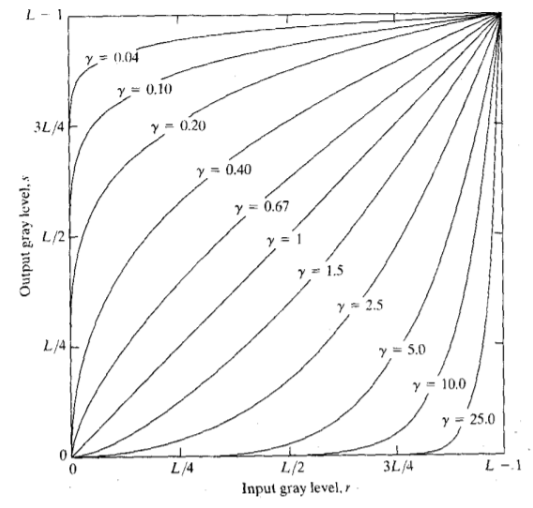

In [ ]:
#import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def stack(*args):
    return np.hstack(args)

In [ ]:
#rescale image
def rescale(img):
    s = img.astype(float)
    s -= np.min(s)
    s /= np.max(s)
    return (s*255).astype(np.uint8)

In [ ]:
#gamma correction
def gamma_correction(r, c, gamma):
    r = r.astype(float)
    s = c*r**gamma
    s = rescale(s)
    return s

In [ ]:
img = cv2.imread(r"C:\Users\ilhan\Desktop\x_ray.png",0)

In [ ]:
#when c is one, applying the 0.6, 0.4, 0.3 gamma values to the image
c = 1
gamma_values = [0.6, 0.4, 0.3]
gamma_images = []
for gamma in gamma_values:
    gamma_img = gamma_correction(img, c=c, gamma=gamma)
    gamma_images.append(gamma_img)

In [ ]:
line1 = stack(img, gamma_images[0])
line2 = stack(*gamma_images[1:])

In [ ]:
grid = np.vstack((line1, line2))

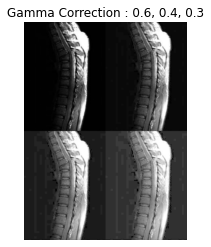

In [ ]:
plt.imshow(grid,cmap="gray")
plt.title("Gamma Correction : 0.6, 0.4, 0.3")
plt.axis("off")
plt.show()